## Computing π

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import astroML.stats

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 805.47it/s]


π = 3.1524


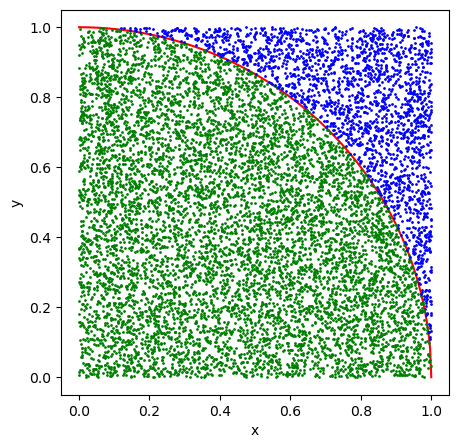

In [8]:
xgrid = np.linspace(0,1,300)
def circle(x):
    return np.sqrt(1-x**2)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(xgrid,circle(xgrid),c='r')

N = 10000
N_circle = 0
x = []
y = []
for i in tqdm(range(N)):
    x.append(random.uniform(0,1))
    y.append(random.uniform(0,1))
    if y[i]<circle(x[i]):
        N_circle += 1
        ax.plot(x[i],y[i],marker='o',markersize=1,c='g')
    else:
        ax.plot(x[i],y[i],marker='o',markersize=1,c='b')

print('π =',4*N_circle/N)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Generalize the code above to compute the volume of an N-dimensional sphere as a function of the number of dimension N.

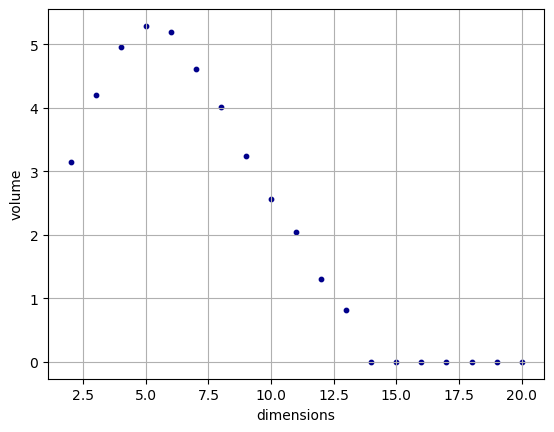

In [9]:
N = np.arange(2,21)
n_samples = 100000
volume = []
for N_dim in N:   
    n_inside = 0
    x = np.zeros((N_dim,n_samples))

    for i in range(n_samples):
        for d in range(N_dim):
            x[d,i] = random.uniform(-1,1)

        if np.sum(x[:,i]**2)<1:
            n_inside += 1

    volume.append( n_inside/n_samples*(2**N_dim) )

plt.scatter(N,volume,s=10,c='darkblue')
plt.grid()
plt.xlabel('dimensions')
plt.ylabel('volume')
plt.show()

# Planning a telescope observation

$p_s=0.9p_s+0.5p_c$

$p_c=0.1p_s+0.5p_c$

$p_s+p_c=1$

$\to \quad p_s=5/6 \quad\quad p_c=1/6$

In [10]:
current = 1         # starting day    LEGEND: clear = 1;  cloudy = 0
days = [current]
Pclear = [np.sum(days)]

for i in tqdm(range(100000)):
    previous = current
    n = random.uniform(0,1)
    if previous==1:      # previous clear
        if n<0.9:
            current = 1
        else:
            current = 0
    else:                # previous cloudy
        if n<0.5:
            current = 1
        else:
            current = 0
    days.append(current)
    Pclear.append(np.sum(days)/len(days))

print('p(clear) =',round(Pclear[-1],2))
print('p(cloudy) =',round(1-Pclear[-1],2))

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [07:22<00:00, 226.05it/s]

p(clear) = 0.83
p(cloudy) = 0.17


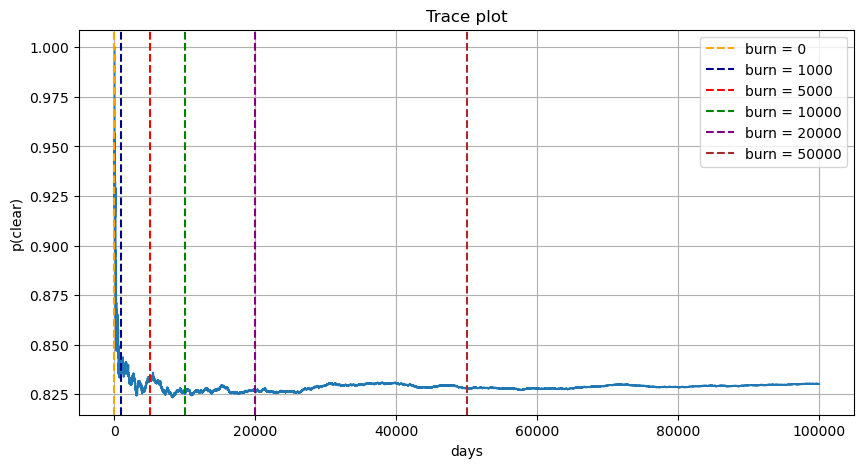

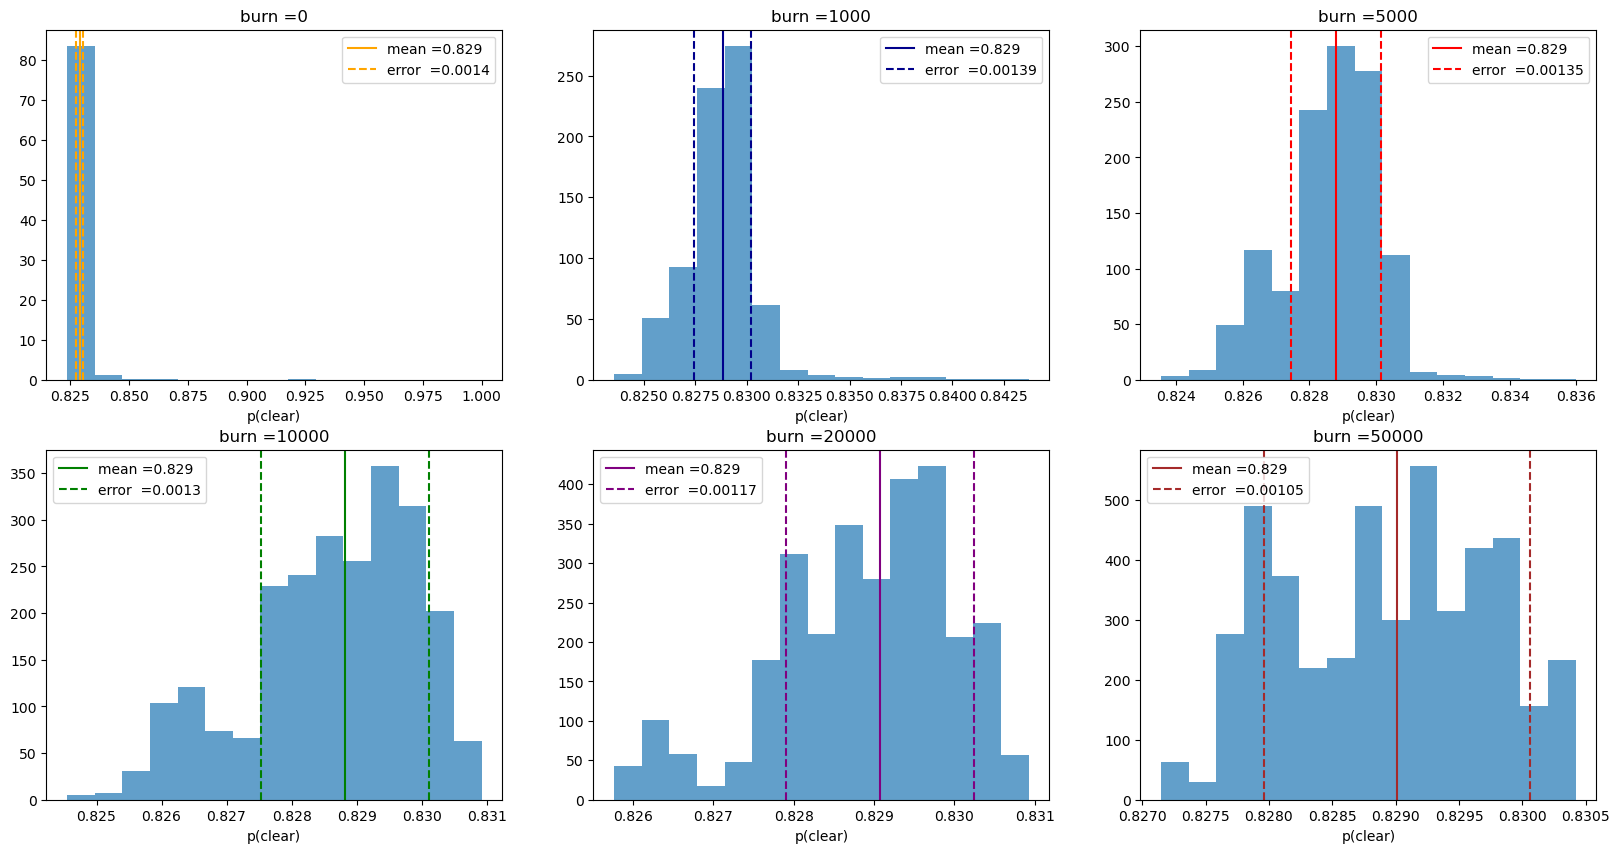

In [24]:
burn = [0,1000,5000,10000,20000,50000]       # burn-in phase   
colors = ['orange','darkblue','r','g','purple','brown','grey','violet','y','lightgreen']

# plot probability of sunny weather as function of the days
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(Pclear)
plt.xlabel('days')
plt.ylabel('p(clear)')
plt.grid()
plt.title('Trace plot')

mu = []
sigma = []
for i in range(len(burn)):
    plt.axvline(burn[i],color=colors[i],linestyle='--', label='burn = '+str(burn[i]))
    mu.append( np.median(Pclear[burn[i]:]) )
    sigma.append( astroML.stats.sigmaG(Pclear[burn[i]:]) )
plt.legend()
plt.show()

# plot histogram of the distribution of p(clear) without the initial "burned" points
fig = plt.figure(figsize=(20,10))
for i in range(len(burn)):
    ax = fig.add_subplot(2,3,i+1)
    ax.hist(Pclear[burn[i]:], 15, density=True, alpha=0.7)
    ax.axvline(mu[i],c=colors[i],label='mean ='+str(round(mu[i],3)))
    ax.axvline(mu[i]+sigma[i],c=colors[i],linestyle='--',label='error  ='+str(round(sigma[i],5)))
    ax.axvline(mu[i]-sigma[i],c=colors[i],linestyle='--')
    ax.set_xlabel('p(clear)')
    ax.set_title('burn ='+str(burn[i]))
    ax.legend()
plt.show()

In [27]:
print(mu)
print(sigma)

[0.8288584234885317, 0.828829742718385, 0.8287880133842646, 0.828821788647049, 0.829069313692015, 0.829013591383209]
[0.001397387373085382, 0.0013857209294246163, 0.0013513855545241426, 0.0012950991623380543, 0.001169333656808, 0.0010500515843536173]


## Stock market

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [03:44<00:00, 444.68it/s]


Final probability:
31.75 %
61.95 %
6.3 %
Proof  1.0


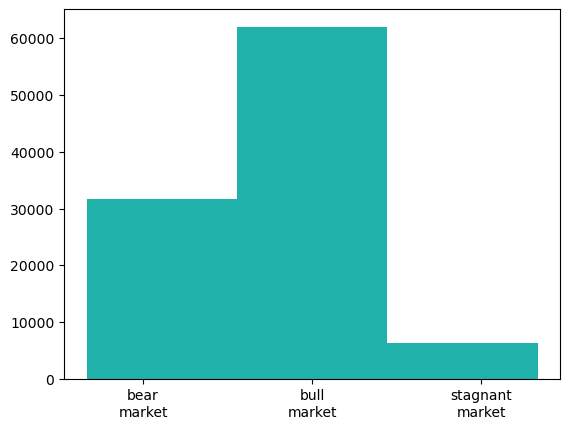

In [41]:
days = []         #   LEGEND:  bear = 0;  bull = 1;  stag = 2.
prob = [[],[],[]]
k = 1    # starting day

for i in tqdm(range(100000)):
    previous = k              
    n = random.uniform(0,1)
    if previous==0:      
        if n<0.8:
            k = 0
        elif n<0.8+0.15:
            k = 1
        else:
            k = 2
    elif previous==1:                
        if n<0.075:
            k = 0
        elif n<0.075+0.9:
            k = 1
        else:
            k = 2
    else:
        if n<0.25:
            k = 0
        elif n<0.25+0.25:
            k = 1
        else:
            k = 2
            
    days.append(k)
    for j in range(3):
        prob[j].append(days.count(j)/(i+1))
        
print('Final probability:')
for i in range(3):
    print(round(100*days.count(i)/len(days),2),'%')
print('Proof ', (days.count(0)+days.count(1)+days.count(2))/len(days))
            
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(days,3,color='lightseagreen')
ax.set_xticks([0.25,1,1.75])
ax.set_xticklabels(['bear\nmarket','bull\nmarket','stagnant\nmarket'])
plt.show()

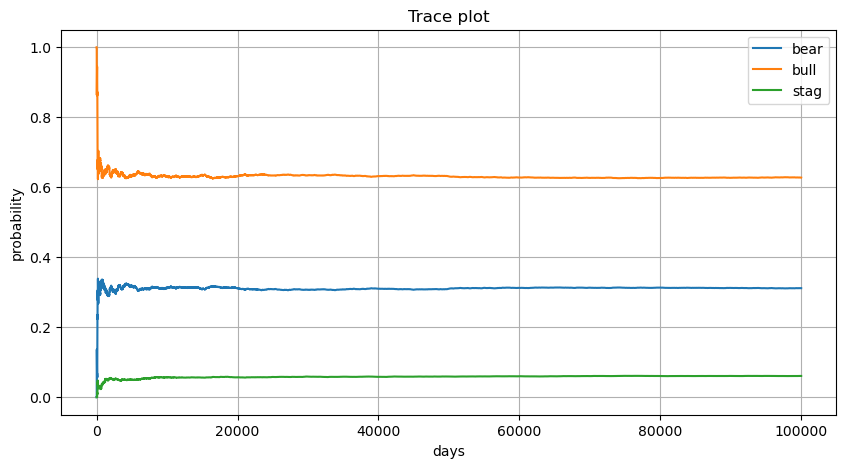

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
label = ['bear','bull','stag']
for i in range(3):
    ax.plot(prob[i],label=label[i])
plt.legend()
plt.grid()
plt.title('Trace plot')
plt.xlabel('days')
plt.ylabel('probability')
plt.show()

Burn = 40000


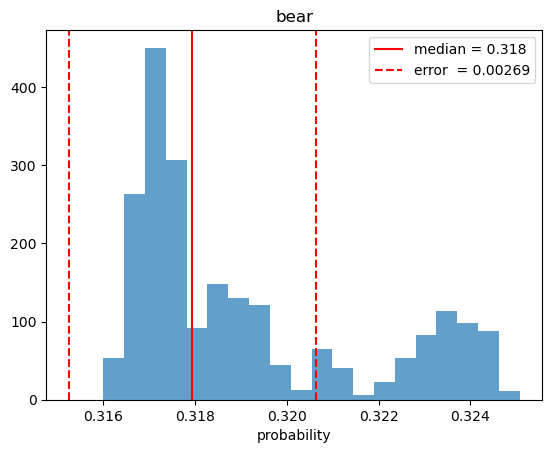

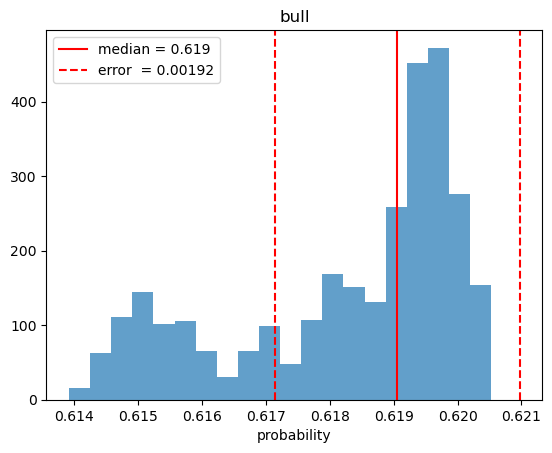

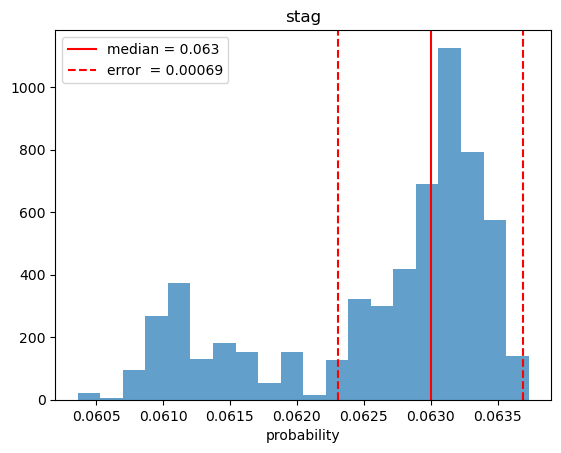

In [43]:
burn = 40000
print('Burn =',burn)

for i in range(3):
    mu = np.median(prob[i][burn:])
    sigma = astroML.stats.sigmaG(prob[i][burn:])
    plt.hist(prob[i][burn:],20,density=True,alpha=0.7)
    plt.axvline(mu,c='r',label='median = '+str(round(mu,3)))
    plt.axvline(mu+sigma,c='r',linestyle='--',label='error  = '+str(round(sigma,5)))
    plt.axvline(mu-sigma,c='r',linestyle='--')
    plt.xlabel('probability')
    plt.title(label[i])
    plt.legend()
    plt.show()